> PROBLEMA DE NEGÓCIO:
- Aqui o objetivo é analisar dados sobre o PIB, população e expectativa de vida de países em 5 continentes
- **Dataset**: dataset6

## Instalando e Carregando os Pacotes

In [43]:
# Imports
import math
import random
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [44]:
# Carregando os dados (atenção quanto ao formato)
dados = pd.read_csv('dados/dataset6.tsv', sep = '\t')  # \t significa que são colunas separadas por TAB

In [45]:
dados.shape

(1704, 6)

In [46]:
dados.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333.0,779.445314
1,Afghanistan,Asia,1957,30.332,9240934.0,820.853030
2,Afghanistan,Asia,1962,31.997,10267083.0,853.100710
3,Afghanistan,Asia,1967,34.020,11537966.0,836.197138
4,Afghanistan,Asia,1972,36.088,13079460.0,739.981106


In [47]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


**Obtendo os anos máximo e mínimo**

In [48]:
first_year = dados['year'].max()
last_year = dados['year'].min()

In [49]:
print('Último ano: ', first_year)
print('Primeiro ano: ', last_year)

Último ano:  2007
Primeiro ano:  1952


In [50]:
# Analisando as estatísicas da coluna gdpPercap
dados['gdpPercap'].describe()

count      1704.000000
mean       7215.327081
std        9857.454543
min         241.165876
25%        1202.060309
50%        3531.846988
75%        9325.462346
max      113523.132900
Name: gdpPercap, dtype: float64

#### 01 - Boxplot com a distribuição do PIB Per-Capita por continente

In [51]:
# Selecionando países e continentes e removendo as duplicidades
countries = dados[['country', 'continent']]
countries = countries.drop_duplicates()

In [52]:
countries.shape   

(142, 2)

In [53]:
# Agrupando por continente e contado o número de países
country_counts = countries.groupby('continent', as_index = False)['country'].count()
country_counts

,continent,country
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


In [54]:
# Criamos uma coluna n_countries para não gerar ambiguidade
country_counts.columns = ['continent', 'n_countries']
country_counts

,continent,n_countries
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


In [55]:
# Listtando os índices de cada continente
continents = country_counts['continent']
continents

0      Africa
1    Americas
2        Asia
3      Europe
4     Oceania
Name: continent, dtype: object

> Aqui faremos uma extração dos PIBs dos países de cada continente

In [56]:
continent_gdp_latest = []  # lista vazia
for c in continents:
    gm_latest_cur_cont = dados[dados['continent'] == c]
    cur_gdp_vals = gm_latest_cur_cont['gdpPercap'].values
    continent_gdp_latest.append(cur_gdp_vals)  # adicionando à lista criada antes do loop

In [57]:
continent_gdp_latest

[array([ 2449.008185 ,  3013.976023 ,  2550.81688  ,  3246.991771 ,
         4182.663766 ,  4910.416756 ,  5745.160213 ,  5681.358539 ,
         5023.216647 ,  4797.295051 ,  5288.040382 ,  6223.367465 ,
         3520.610273 ,  3827.940465 ,  4269.276742 ,  5522.776375 ,
         5473.288005 ,  3008.647355 ,  2756.953672 ,  2430.208311 ,
         2627.845685 ,  2277.140884 ,  2773.287312 ,  4797.231267 ,
         1062.7522   ,   959.6010805,   949.4990641,  1035.831411 ,
         1085.796879 ,  1029.161251 ,  1277.897616 ,  1225.85601  ,
         1191.207681 ,  1232.975292 ,  1372.877931 ,  1441.284873 ,
          851.2411407,   918.2325349,   983.6539764,  1214.709294 ,
         2263.611114 ,  3214.857818 ,  4551.14215  ,  6205.88385  ,
         7954.111645 ,  8647.142313 , 11003.60508  , 12569.85177  ,
          543.2552413,   617.1834648,   722.5120206,   794.8265597,
          854.7359763,   743.3870368,   807.1985855,   912.0631417,
          931.7527731,   946.2949618,  1037.6452

([<matplotlib.axis.XTick at 0x1226f43b3d0>,
 [Text(1, 0, 'Africa'),
  Text(2, 0, 'Americas'),
  Text(3, 0, 'Asia'),
  Text(4, 0, 'Europe'),
  Text(5, 0, 'Oceania')])

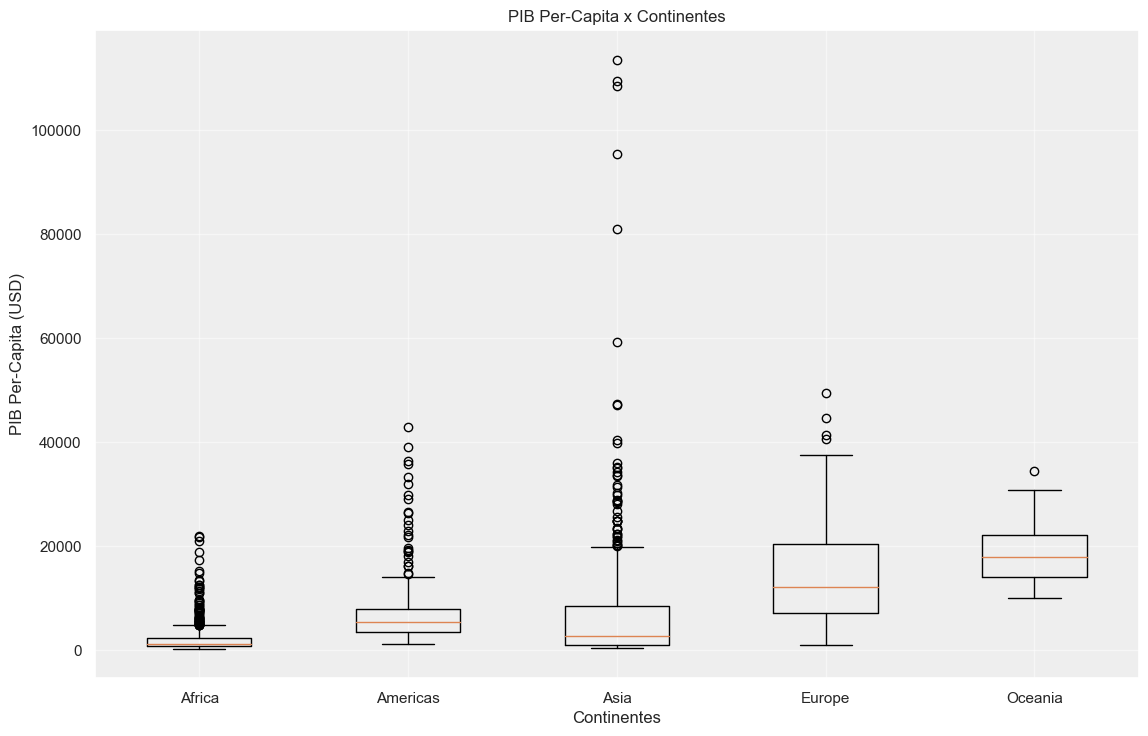

In [58]:
# Plotando a análise
plt.figure(figsize = (12,8))
plt.boxplot(continent_gdp_latest)
plt.title('PIB Per-Capita x Continentes')
plt.xlabel('Continentes')
plt.ylabel('PIB Per-Capita (USD)')
plt.xticks(range(1, len(continents)+1), continents)

> Análise do gráfico:
- Asia tem renda percapita baixa, mas possui muitos outliers, o que não dá para perceber uma igualdade
- Europa está mais próxima à mediana
- Africa tem uma faixa menor e mais próxima a mínima, tendo ainda alguns outliers
- Americas têm muitos outliers mas sua faixa está próxima mediana

#### 02 - Gráfico de linha com o PIB Per-Capita ao longo do tempo em Portugal e Espanha

In [59]:
portugal = dados[dados['country'] == 'Portugal']
portugal.head()

,country,continent,year,lifeExp,pop,gdpPercap
1236,Portugal,Europe,1952,59.82,8526050.0,3068.319867
1237,Portugal,Europe,1957,61.51,8817650.0,3774.571743
1238,Portugal,Europe,1962,64.39,9019800.0,4727.954889
1239,Portugal,Europe,1967,66.60,9103000.0,6361.517993
1240,Portugal,Europe,1972,69.26,8970450.0,9022.247417


In [60]:
spain = dados[dados['country'] == 'Spain']
spain.head()

,country,continent,year,lifeExp,pop,gdpPercap
1416,Spain,Europe,1952,64.94,28549870.0,3834.034742
1417,Spain,Europe,1957,66.66,29841614.0,4564.802410
1418,Spain,Europe,1962,69.69,31158061.0,5693.843879
1419,Spain,Europe,1967,71.44,32850275.0,7993.512294
1420,Spain,Europe,1972,73.06,34513161.0,10638.751310


> Aqui os 2 plots serão integrados em 1 só

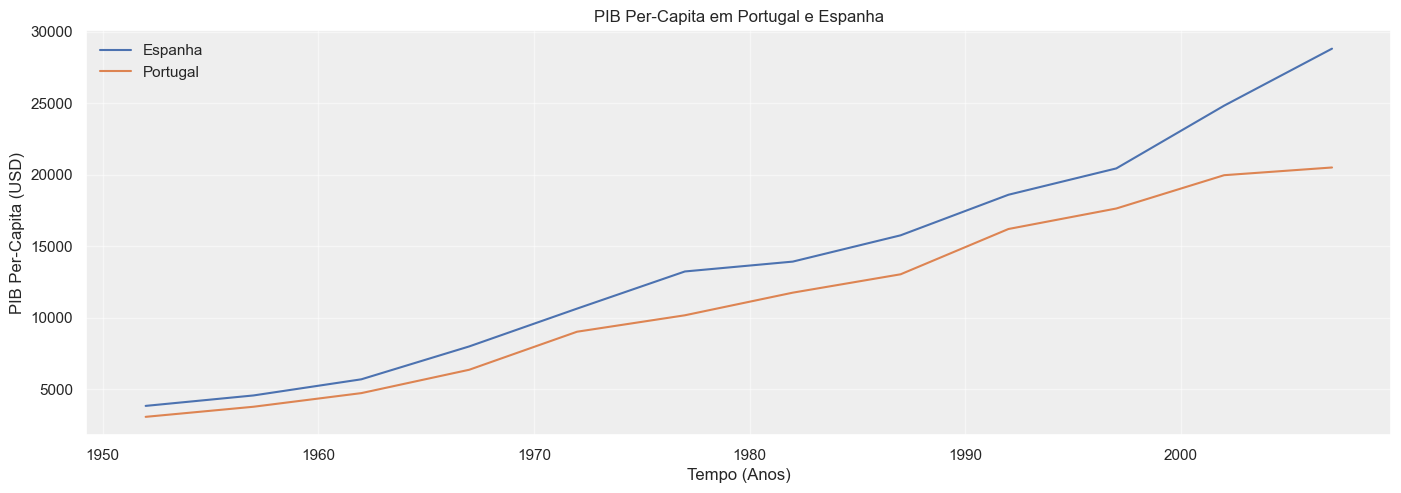

In [61]:
# Plot
plt.figure(figsize = (15,5))
plt.plot(spain['year'], spain['gdpPercap'], label = 'Espanha')
plt.plot(portugal['year'], portugal['gdpPercap'], label = 'Portugal')
plt.title('PIB Per-Capita em Portugal e Espanha')
plt.xlabel('Tempo (Anos)')
plt.ylabel('PIB Per-Capita (USD)')
plt.legend()

#### 03 - Gráfico de linha com as informações anteriores mas em plots separados (subplots)

(2500.0, 30000.0)

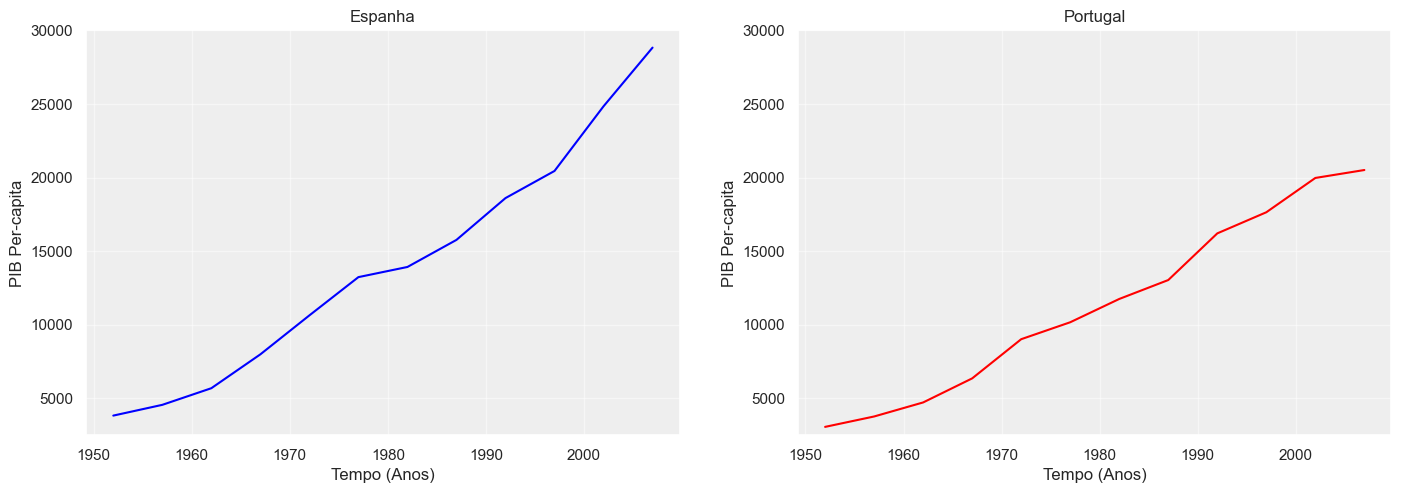

In [62]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(spain['year'], spain['gdpPercap'], color = 'blue')
plt.title('Espanha')
plt.xlabel('Tempo (Anos)')
plt.ylabel('PIB Per-capita')
plt.ylim(2500, 30000)

plt.subplot(1,2,2)
plt.plot(portugal['year'], portugal['gdpPercap'], color = 'red')
plt.title('Portugal')
plt.xlabel('Tempo (Anos)')
plt.ylabel('PIB Per-capita')
plt.ylim(2500, 30000)

#### 04 - Scatter Plot mostrando a relação entre PIB Per-Capita e expectativa de vida

> Gráfico com recurso diferente. Como estamos lidando com uma escala de dados elevada, utilizaremos a função matemática logaritmo. Para melhor visualizar, faremos o mesmo gráfico por 2 vezes

**Com logaritmo** (da biblioteca Numpy)

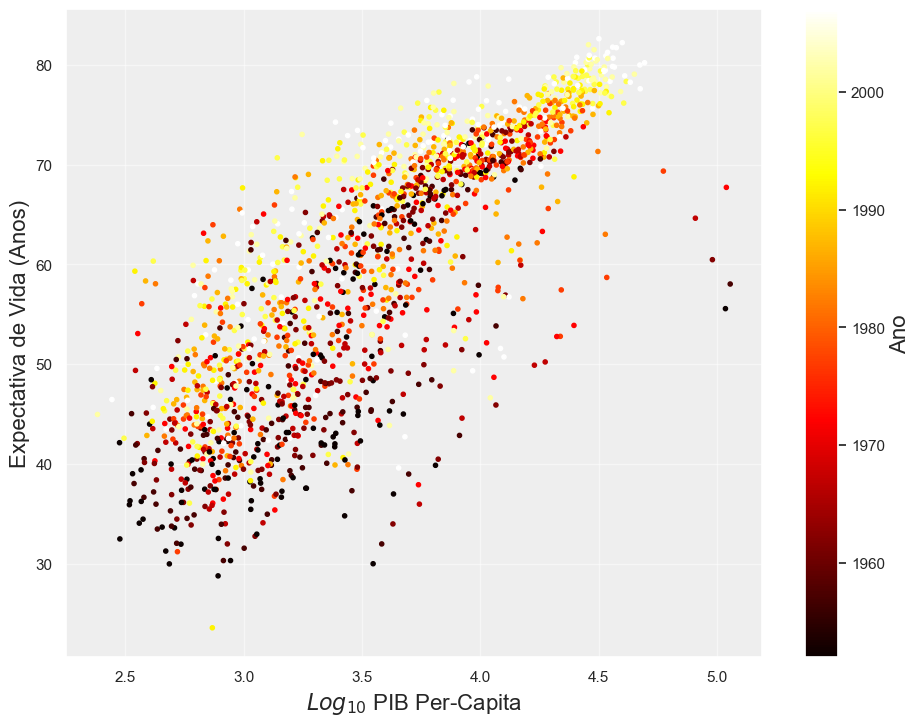

In [63]:
plt.figure(figsize = (10, 8))
plt.scatter(np.log10(dados['gdpPercap']), 
            dados['lifeExp'], 
            marker = '.', 
            c = dados['year'], 
            cmap = 'hot')
plt.xlabel('$Log_{10}$ PIB Per-Capita', fontsize = 16)
plt.ylabel('Expectativa de Vida (Anos)', fontsize = 16)
plt.colorbar().set_label('Ano', fontsize = 16)

**Sem logaritmo**

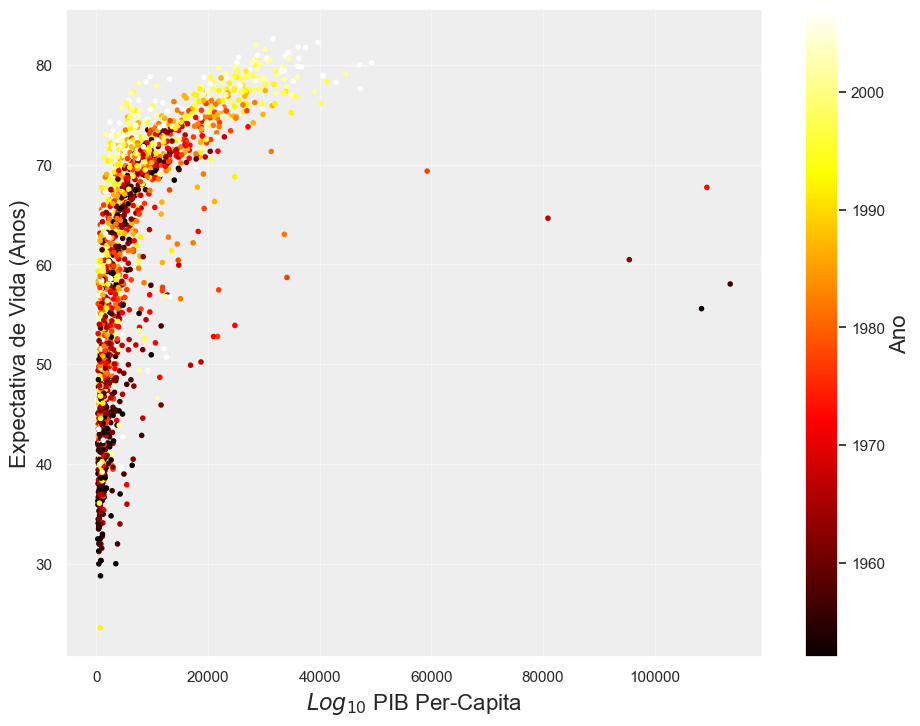

In [64]:
plt.figure(figsize = (10, 8))
plt.scatter(dados['gdpPercap'], 
            dados['lifeExp'], 
            marker = '.', 
            c = dados['year'], 
            cmap = 'hot')
plt.xlabel('$Log_{10}$ PIB Per-Capita', fontsize = 16)
plt.ylabel('Expectativa de Vida (Anos)', fontsize = 16)
plt.colorbar().set_label('Ano', fontsize = 16)

> Repare que os pontos ficam perto de 0, o que não é a realidade.

> A análise diz o óbvio: quanto maior o PIB Per-capita, maior a expectativa de vida

#### 05 - Scatter Plot com as informações do gráfico anterior mas divididos por continente (em subplots)

> Aqui usamos um loop para criar o gráfico de cada continente, sem sobreposição. Ou seja, ao invés de repetir código, usamos um loop

**Com logaritmo**

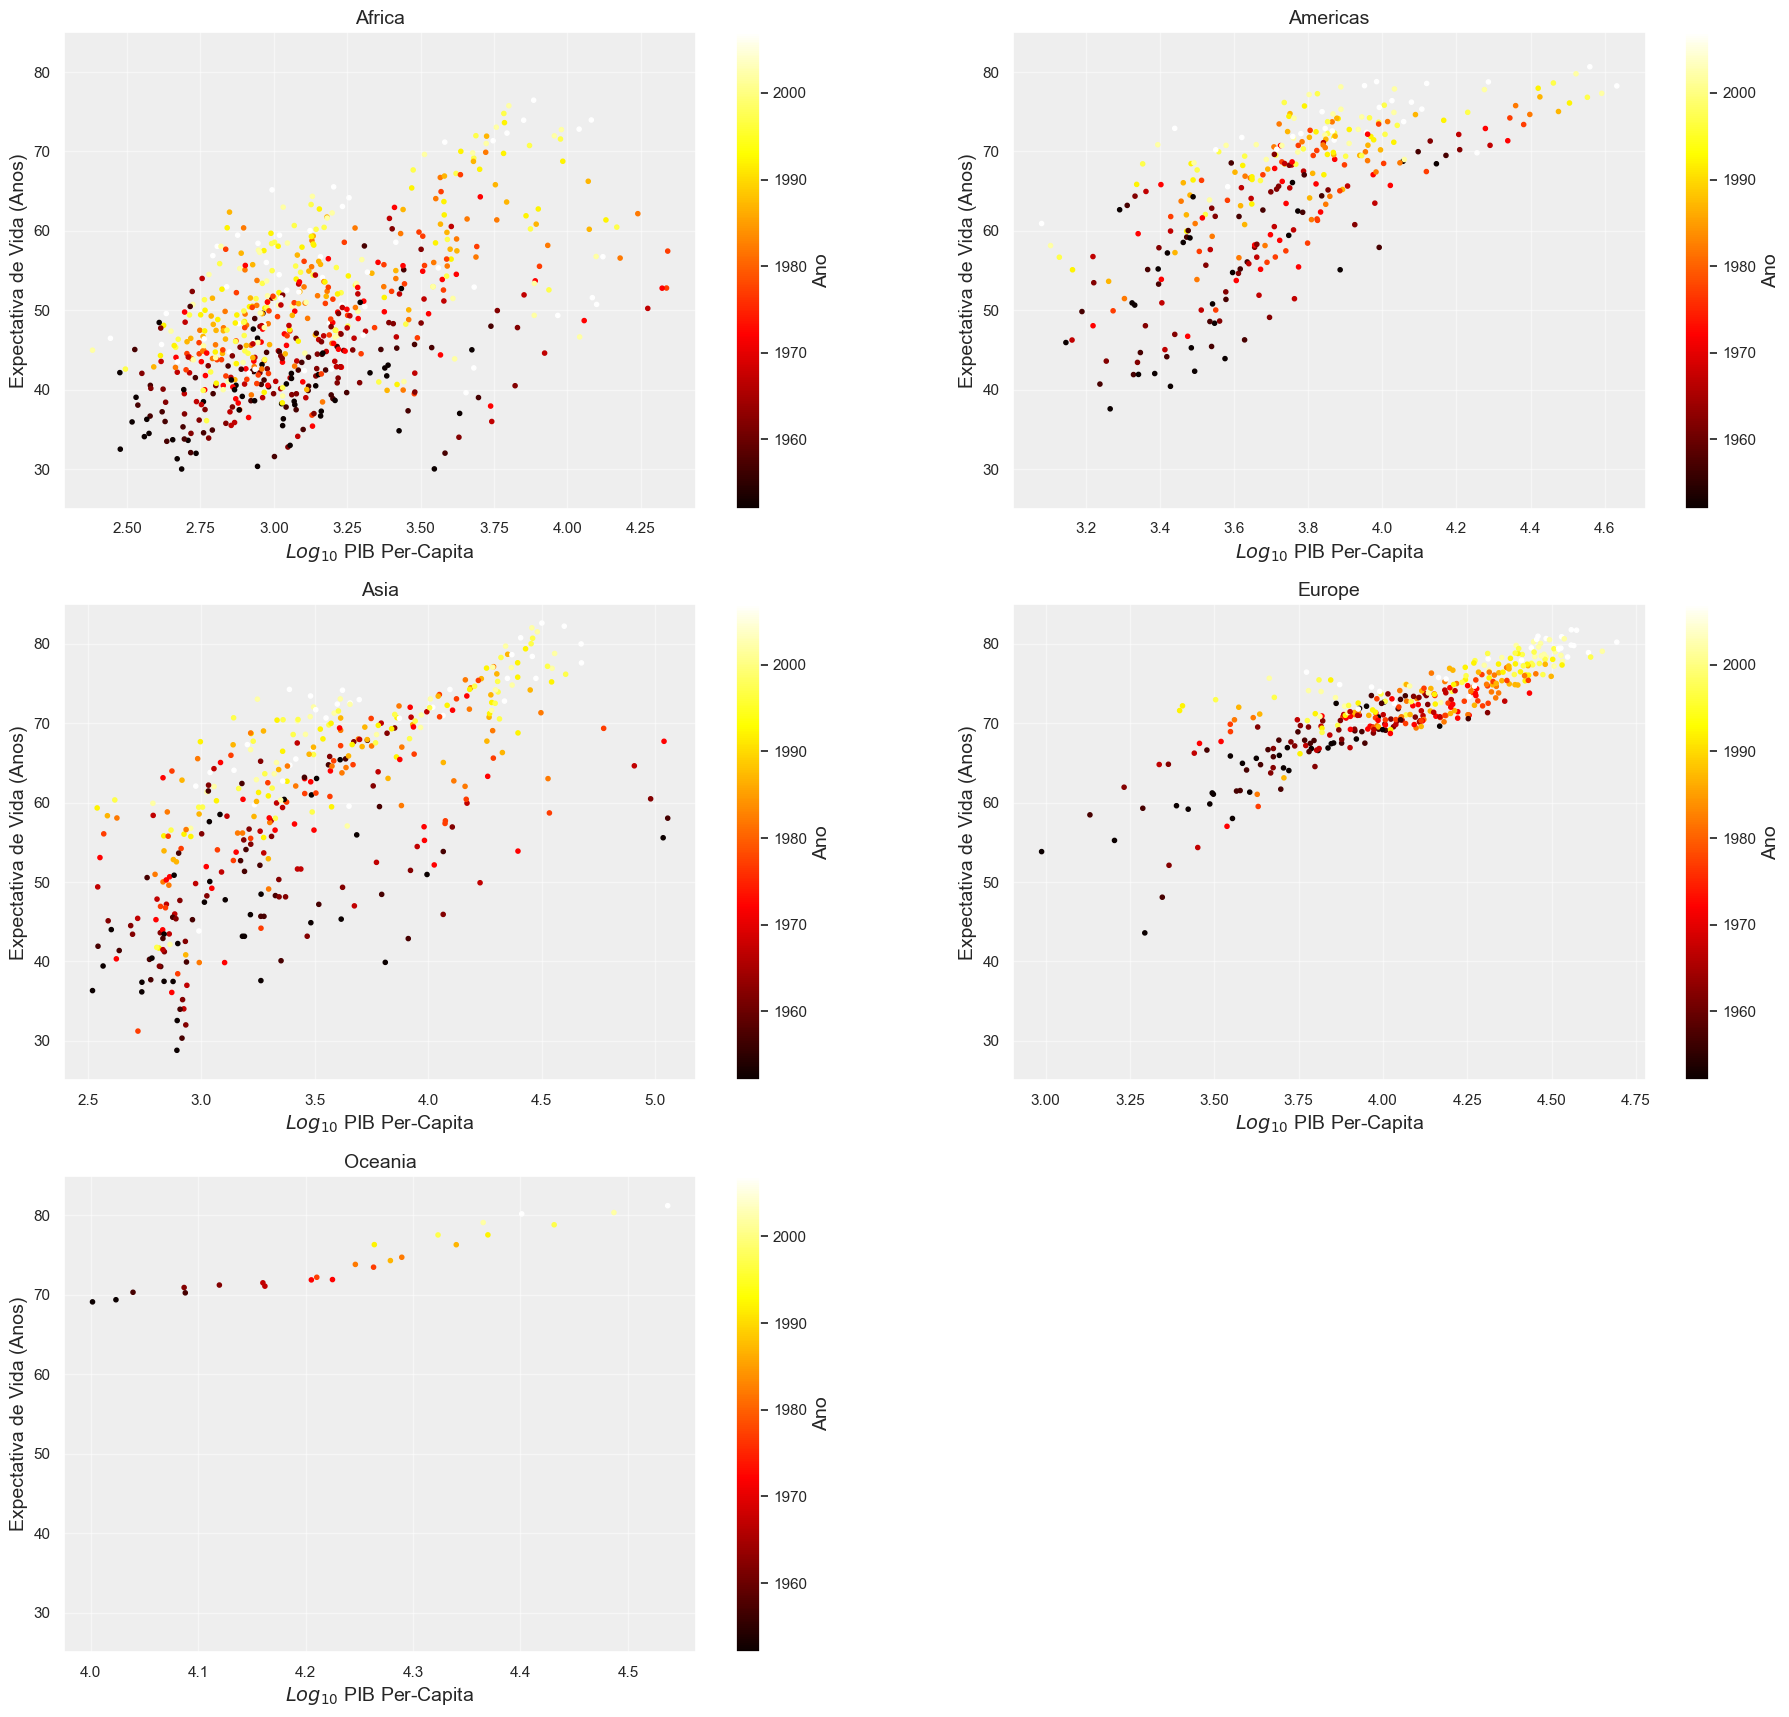

In [65]:
plt.figure(figsize = (20,20))

# Loop
for i, continent in enumerate(continents):
    cur_continent_df = dados[dados['continent'] == continent]
    plt.subplot(3, 2, i + 1)          # ==> 3 LINHAS e 2 COLUNAS e a POSIÇÃO cada gráfico, usamos o contador do loop (i)
    # Plot
    plt.scatter(np.log10(cur_continent_df['gdpPercap']),   # log usado novamente
                cur_continent_df['lifeExp'], 
                marker = '.', 
                c = cur_continent_df['year'], 
                cmap = 'hot')
    # Labels
    plt.xlabel('$Log_{10}$ PIB Per-Capita', fontsize = 14)
    plt.ylabel('Expectativa de Vida (Anos)', fontsize = 14)
    plt.title(continent, fontsize = 14)
    plt.ylim(25,85)
    plt.colorbar().set_label('Ano', fontsize = 14)

#### 06 - Scatter Plot mostrando a relação entre PIB Per-Capita x População

>INSIGHT: antes criamos o scatterplot usando o scatter() do **matplotlib**, agora usamos a função plot do **pandas**

Text(0.5, 1.0, 'PIB Per-Capita x População ao Longo do Tempo')

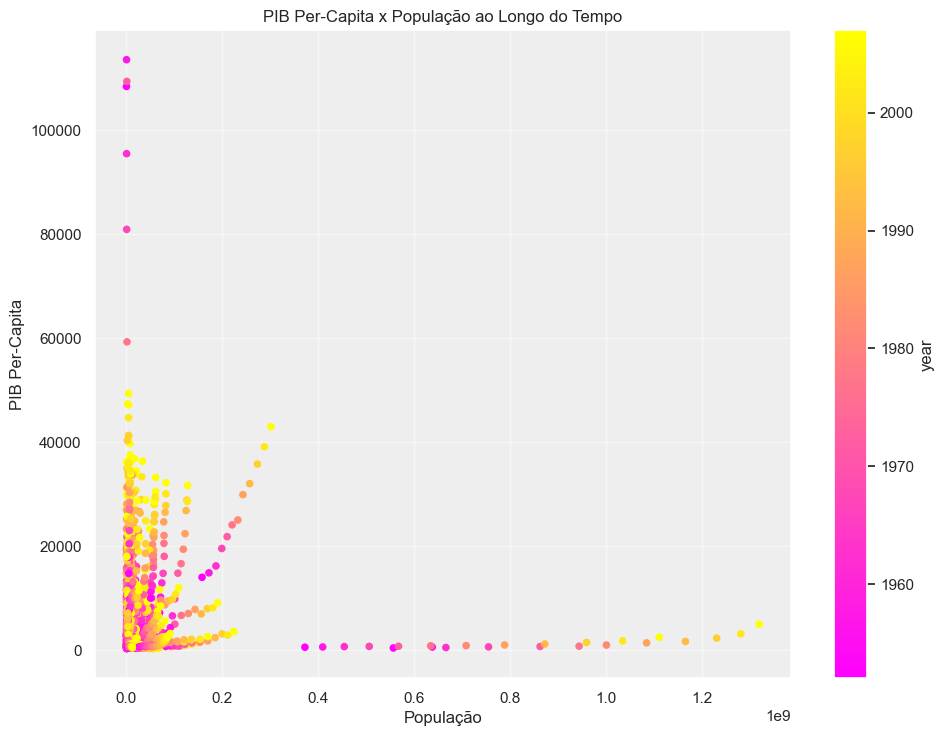

In [66]:
dados.plot(x = 'pop', 
           y = 'gdpPercap', 
           c = 'year', 
           cmap = 'spring', 
           kind = 'scatter', 
           figsize = (10,8))
plt.xlabel('População')
plt.ylabel('PIB Per-Capita')
plt.title('PIB Per-Capita x População ao Longo do Tempo')

>Não foi necessária a implantação do logaritmo pois conseguimos interpretar o gráfico

#### 07 - Gráfico de linha que mostra: evolução média do PIB por continente, ao longo do tempo (com divisão por décadas)

> Já que os dados serão exibidos em décadas, obviamente serão divididos de 10 em 10
> Além disso, criamos um array com as cores em hexadecimal

In [67]:
hexsix = np.array(['#ffffcc', '#d9f0a3', '#addd8e', '#78c679', '#31a354', '#006837'])  # array com cores
dados['decade'] = (dados['year'] / 10).astype(int)  # divisão para se obter décadas, convertido no tipo inteiro

In [68]:
# Valores únicos
decade = dados['decade'].unique()
decade

array([195, 196, 197, 198, 199, 200])

> Agora faremos o cálculo da média do PIB por continente
- Sintaxe: agrupamento por continente e ano - sem indexação - dados da coluna 'gdpPercap' - média

In [69]:
per_continent_mean_gdp = dados.groupby(['continent', 'year'], as_index= False)['gdpPercap'].mean()
per_continent_mean_gdp

,continent,year,gdpPercap
0,Africa,1952,1252.572466
1,Africa,1957,1385.236062
2,Africa,1962,1598.078825
3,Africa,1967,2050.363801
4,Africa,1972,2339.615674
5,Africa,1977,2585.938508
6,Africa,1982,2481.592960
7,Africa,1987,2282.668991
8,Africa,1992,2281.810333
9,Africa,1997,2378.759555


> **EXTRA:** aqui disponibilizo um dicionário com alguns parâmetros como: cor, tamanho título, posição dos eixos, etc

In [76]:
params = {'figure.facecolor' : 'white',
          'axes.facecolor' : 'white',
          
          'axes.titlesize' : 'x-large',
          'axes.axisbelow' : True,
          
          'axes.edgecolor' : 'DimGray',
          'axes.linewidth' : 0.5,
          
          'axes.labelsize' : 'large',
          'axes.labelcolor' : '#4A4A4A',
          
          'axes.grid' : True,
          'grid.linestyle' : ':',
          'grid.color' : 'DimGray',
          'grid.alpha' : 0.5,
          
          'xtick.color' : '#4A4A4A',
          'xtick.major.size' : 0,
          'xtick.minor.size' : 0,
          'xtick.labelsize' : 'medium',
          
          'ytick.color' : '#4A4A4A',
          'ytick.major.size' : 0,
          'ytick.minor.size' : 0,
          'ytick.labelsize' : 'medium',
          
          'text.color' : '#4A4A4A',
          
          'legend.fancybox' : False,
          'legend.frameon' : False,
          'legend.fontsize' : 'large'}

> **PONTO CRÍTICO:** aqui é onde inserimos os parâmetros do dicionário(que é apenas um texto) na variável rcParams (variável do plt). Fiz isso utilizando um laço For para preencher com cada um dos valores.

In [77]:
for (k, v) in params.items(): 
    plt.rcParams[k] = v

> Estilizando o plt (muito utilizado no Power BI)

In [78]:
plt.style.use('fivethirtyeight')

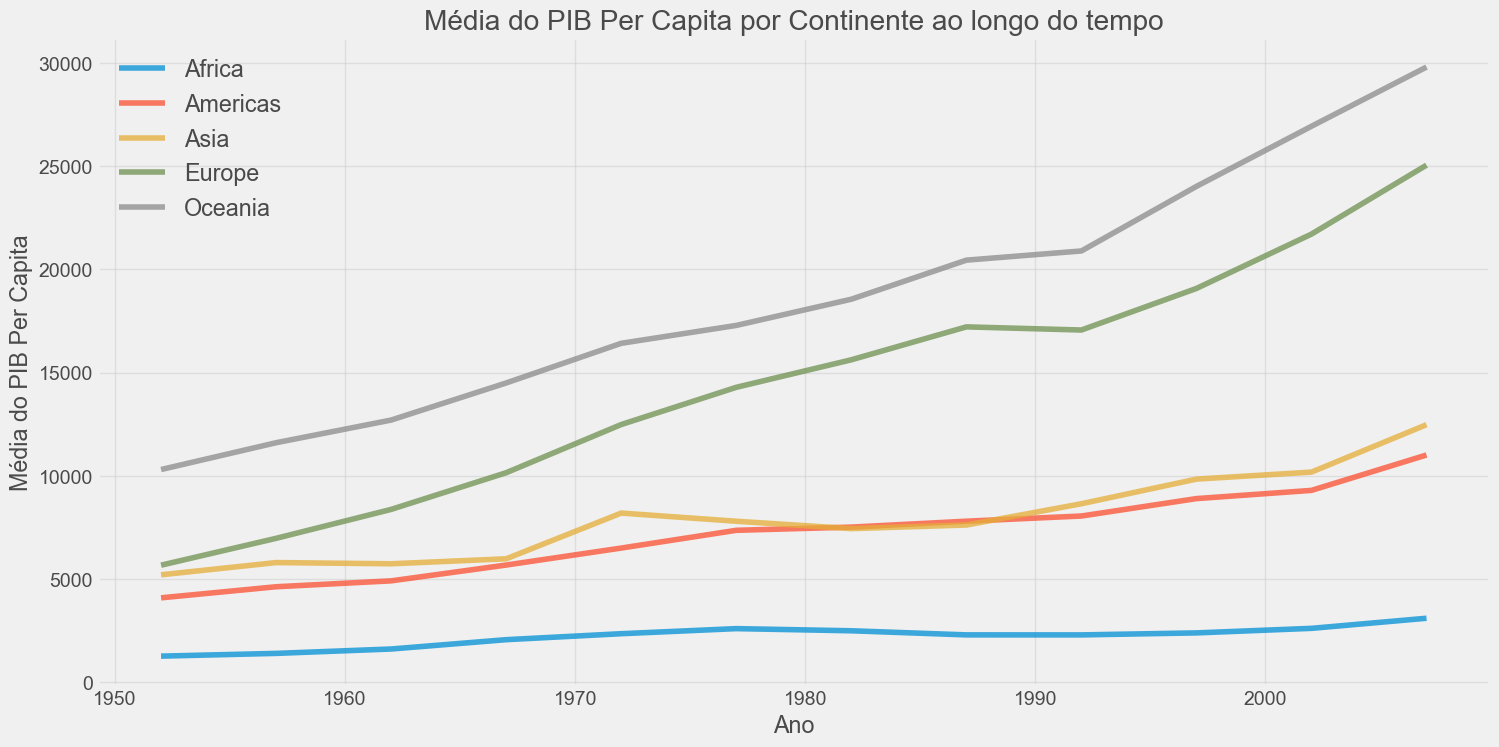

In [81]:
plt.figure(figsize = (16, 8))

for continent in continents:
    cur_continent_df = per_continent_mean_gdp[per_continent_mean_gdp['continent'] == continent]  # tratamento dos dados para cada execução
    plt.plot(cur_continent_df['year'],   
             cur_continent_df['gdpPercap'], 
             alpha = 0.75,    # tamanho personalizado para tamanho dos dados
             label = continent)

plt.title('Média do PIB Per Capita por Continente ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Média do PIB Per Capita')
plt.legend(loc = 'upper left')    # posicionamento da legenda no canto esquerdo superior

> Note que são 5 plots em um só e neles notamos que Europa e Oceania registraram grande expansão a partir de 2000, enquanto o resto cresceu em ritmo mais lento, com exceção da Afria que praticamente se manteve estável desde 1950

#### 08 - Boxplot e Stripplot com a distribuição da expectativa de vida por continente

> Esse gráfico se torna interessante por em um mesmo gráfico, ter diferentes plotagens

Text(0, 0.5, 'Expectativa de Vida')

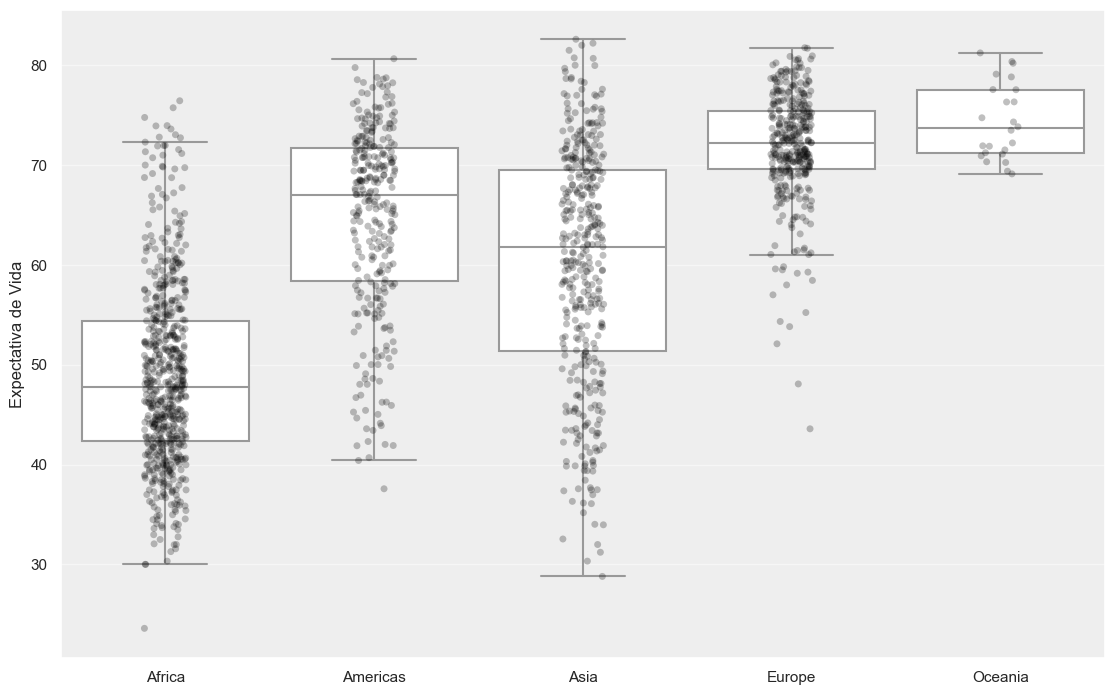

In [74]:
sns.set(rc = {'axes.facecolor' : '#EEEEEE'})
plt.figure(figsize = (12, 8))

# BOXPLOT
sns.boxplot(x = "continent", 
            y = "lifeExp", 
            data = dados,
            order = np.sort(dados.continent.unique()),
            color = 'white', 
            fliersize = 0)

# STRIPPLOT
sns.stripplot(x = "continent", 
              y = "lifeExp", 
              data = dados,
              order = np.sort(dados.continent.unique()),
              alpha = 0.25, 
              size = 5,       # tamanho dos pontos do gráfico
              jitter = True,  # para espoalhar os pontos dos dados pelo gráfico
              color = 'Black', 
              edgecolor = 'Black')

plt.xlabel('')
plt.ylabel('Expectativa de Vida')

> O Boxplot explica:
- Quanto menor o tamanho da caixa, maior a concentração dos dados
- Afria, Americas e Asia possuem caixas mais alongadas e pontos mais distribuídos, o que podem indicar desigualdades

#### 09 - Jointplot com Scatter Plot e Histograma do PIB e da expectativa de vida

> Outra combinação interessante, pois os gráficos de barras se adequam à escala do scatterplot

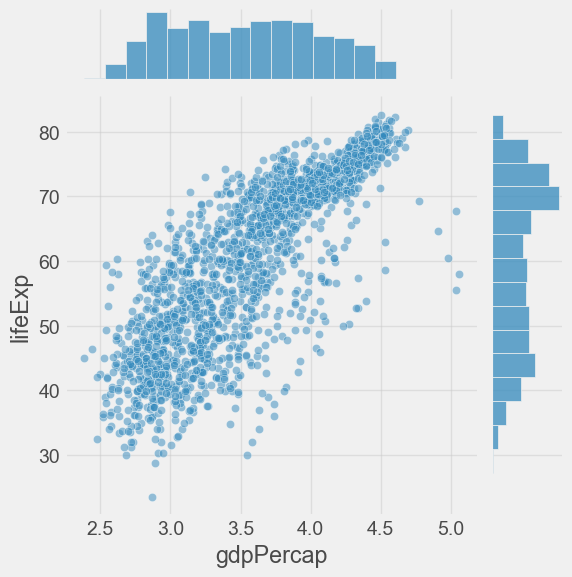

In [82]:
sns.jointplot(np.log10(dados['gdpPercap']), dados['lifeExp'], color = "#348ABD", alpha = 0.5)

# Fim